### Métodos Computacionales 2023
#### Tomas Curzio, Pilar Solari Barrios

## Trabajo Práctico 2: Gradiente Descendente


*Comenzamos a construir los metodos que nos ayudarán más adelante...*

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import e

### Método forward
Se encarga de devolver el resultado de evaluar la función $f_\theta$ que consta de dos capas:
$$f_\theta = W_2 \sigma (W_1 x + b_1)+b_2$$

In [191]:
def forward(W1, W2, b1, b2, x):
    capa1 = W1 @ x + b1
    
    sigmoide = 1/(1+np.exp(-capa1))

    capa2 = W2 @ sigmoide + b2
    return capa2

### Método gradiente numerico
Computa la derivada parcial contra cada uno de los parametros de la red
$$\frac{\partial L}{\partial p} \sim \frac{L(\theta_t,p+\epsilon)-L(\theta_t,p-\epsilon)}{2\epsilon}$$

In [192]:
def funcion_objetivo(x, y, W1, W2, b1, b2):
    loss = 0.5*np.mean((forward(W1,W2,b1,b2,x) - y)**2)
    return loss

def numerical_gradient(x, y, W1, W2, b1, b2, eps):
    gradients = []

    gradients.append(np.zeros_like(W1))
    gradients.append(np.zeros_like(W2))
    gradients.append(np.zeros_like(b1))
    gradients.append(np.zeros_like(b2))

    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            W1_mas_eps = W1.copy()
            W1_mas_eps[i, j] += eps

            W1_menos_eps = W1.copy()
            W1_menos_eps[i, j] -= eps

            loss_mas_eps = funcion_objetivo(x, y, W1_mas_eps, W2, b1, b2)
            loss_menos_eps = funcion_objetivo(x, y, W1_menos_eps, W2, b1, b2)

            gradients[0][i, j] = (loss_mas_eps - loss_menos_eps) / (2 * eps)

    for i in range(W2.shape[0]):
        for j in range(W2.shape[1]):
            W2_mas_eps = W2.copy()
            W2_mas_eps[i, j] += eps

            W2_menos_eps = W2.copy()
            W2_menos_eps[i, j] -= eps

            loss_mas_eps = funcion_objetivo(x, y, W1, W2_mas_eps, b1, b2)
            loss_menos_eps = funcion_objetivo(x, y, W1, W2_menos_eps, b1, b2)

            gradients[1][i, j] = (loss_mas_eps - loss_menos_eps) / (2 * eps)

    for i in range(b1.shape[0]):
        for j in range(b1.shape[1]):
            b1_mas_eps = b1.copy()
            b1_mas_eps[i, j] += eps

            b1_menos_eps = b1.copy()
            b1_menos_eps[i, j] -= eps

            loss_mas_eps = funcion_objetivo(x, y, W1, W2, b1_mas_eps, b2)
            loss_menos_eps = funcion_objetivo(x, y, W1, W2, b1_menos_eps, b2)

            gradients[2][i, j] = (loss_mas_eps - loss_menos_eps) / (2 * eps)

    for i in range(b2.shape[0]):
        for j in range(b2.shape[1]):
            b2_mas_eps = b2.copy()
            b2_mas_eps[i, j] += eps

            b2_menos_eps = b2.copy()
            b2_menos_eps[i, j] -= eps

            loss_mas_eps = funcion_objetivo(x, y, W1, W2, b1, b2_mas_eps)
            loss_menos_eps = funcion_objetivo(x, y, W1, W2, b1, b2_menos_eps)

            gradients[3][i, j] = (loss_mas_eps - loss_menos_eps) / (2 * eps)

    return gradients

### Metodo fit
Este metodo realiza el ciclo de entrenamiento de la red calculando el gradiente promedio para todas las muestras del dataset y actualiza los parametros en esa dirección.

In [193]:
# funcion fit y loop de entrenamiento
def fit(x, y, W1, W2, b1, b2, learning_rate, epochs):
    eps = 0.001
    loss_accum = []
    for i in range(epochs):

        gradiente = numerical_gradient(x, y, W1, W2, b1, b2, eps)
        W1 = W1 - learning_rate*gradiente[0]
        W2 = W2 - learning_rate*gradiente[1]
        b1 = b1 - learning_rate*gradiente[2]
        b2 = b2 - learning_rate*gradiente[3]
        
        loss = funcion_objetivo(x, y, W1, W2, b1, b2)
        loss_accum.append(loss)

    theta = [W1, W2, b1, b2]
    return theta, loss_accum

In [194]:
def predict(x, W1, W2, b1, b2):
    y = forward(W1, W2, b1, b2, x)
    return y

### Inicialización de variables W1, b1, W2 y b2

In [195]:
W1 = np.random.random((5, 6))  # matriz 5x6 
b1 = np.random.random((5, 1))  # vector 5x1
print(W1)

W2 = np.random.random((1, 5))  # matriz 1x5
b2 = np.random.random((1, 1))  

[[0.68704874 0.33258796 0.05474477 0.49441826 0.66545538 0.85373421]
 [0.60380668 0.35979529 0.83606927 0.32447071 0.92693537 0.2819809 ]
 [0.51409503 0.83498205 0.19476925 0.30504011 0.6527918  0.91734817]
 [0.38950181 0.97399463 0.52133868 0.06692075 0.51678535 0.66933013]
 [0.434631   0.07762368 0.26820626 0.97479056 0.36588694 0.96737763]]


### Recolección de datos

Tomamos los datos del archivo y los asignamos desde la posición 0 a la 315 como los de entrenamiento, y desde la 315 hasta el final como los datos de prueba.

In [196]:
df = pd.read_excel("Real estate valuation data set.xlsx")
datos = df.to_numpy()

X = datos[:315, [1,2,3,4,5,6]] 

Y = datos[:315,[7]]

X_test = datos[315:, [1,2,3,4,5,6]]
Y_test = datos[315:,[7]]

### Normalizamos las matrices

In [197]:
X_mean = X.mean(axis=1).reshape((X.shape[0],1))
X_std = np.std(X, axis=1).reshape((X.shape[0], 1))

xt_norm_aux = X - X_mean
xt_norm = xt_norm_aux / X_std

X_test_mean = X_test.mean(axis=1).reshape((X_test.shape[0],1))
X_test_std = np.std(X_test, axis=1).reshape((X_test.shape[0], 1))

xt_test_norm_aux = X_test - X_test_mean
xt_test_norm = xt_test_norm_aux / X_test_std


### Entrenamiento de la red

Partiendo de la experimentacion que realizamos para los distintos parametros llegamos a que los valores que nos arrojan mejor resultado son: 
$$ \alpha = 0.001 $$
$$ epochs = 3000 $$
$$ eps = 0.001 $$

In [198]:
xt_norm = xt_norm.transpose()

res = fit(xt_norm, Y, W1, W2, b1, b2, 0.001, 3000)
theta = res[0]
loss = res[1]

xt_test_norm = xt_test_norm.transpose()

predictions = []

preds = predict(xt_test_norm, theta[0], theta[1], theta[2], theta[3])


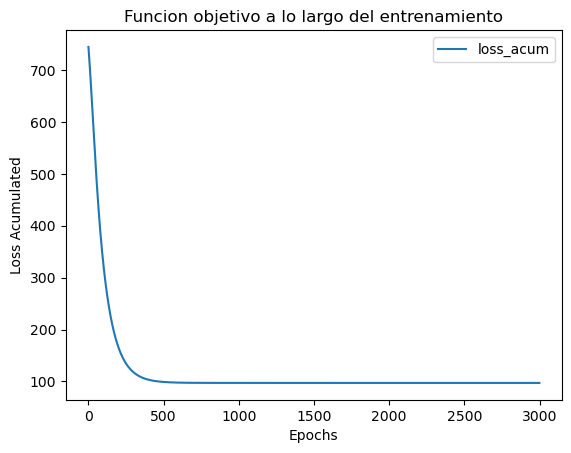

In [199]:
data = {'epochs': range(3000),
        'loss_acum': loss}

df = pd.DataFrame(data)

df.plot(x='epochs', y='loss_acum')

plt.title('Funcion objetivo a lo largo del entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss Acumulated')

plt.show()

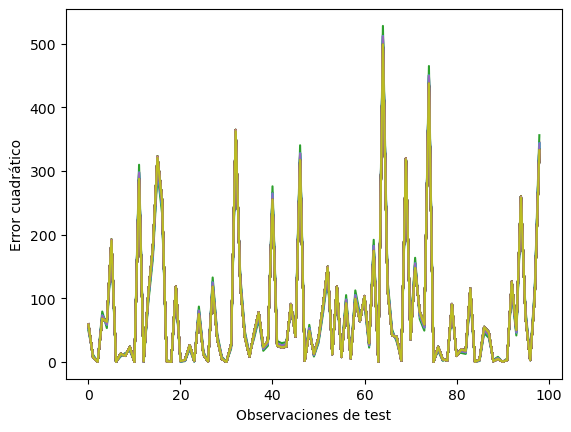

In [200]:
plt.plot(0.5*(Y_test - preds)**2)
plt.ylabel("Error cuadrático")
plt.xlabel("Observaciones de test")
plt.show()